In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
dataframe = pd.read_csv('housing1.csv')

In [3]:
dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
dataframe.ocean_proximity

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [7]:
dataframe.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
dataframe['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
print(dataframe['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [10]:
dataframe.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


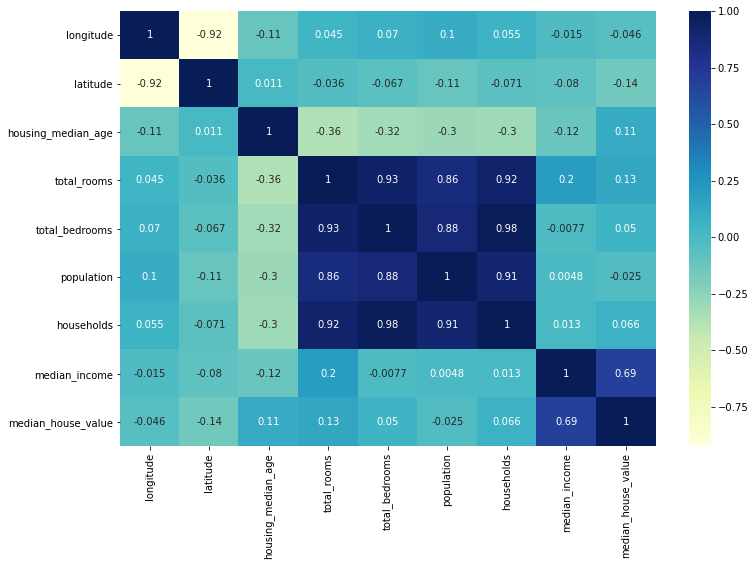

In [11]:
plt.figure(figsize = (12,8))
sns.heatmap(dataframe.corr(),annot = True , cmap = 'YlGnBu')


In [12]:
dataframe.median()

longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

In [13]:
dataframe['total_bedrooms'].fillna(value = dataframe['total_bedrooms'].median(),inplace = True)

In [14]:
dataframe.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
dummies = pd.get_dummies(dataframe['ocean_proximity'],drop_first = True)

In [16]:
dummies.head()

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [17]:
dataframe = pd.concat([dataframe,dummies] , axis = 1)

In [18]:
dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,1,0


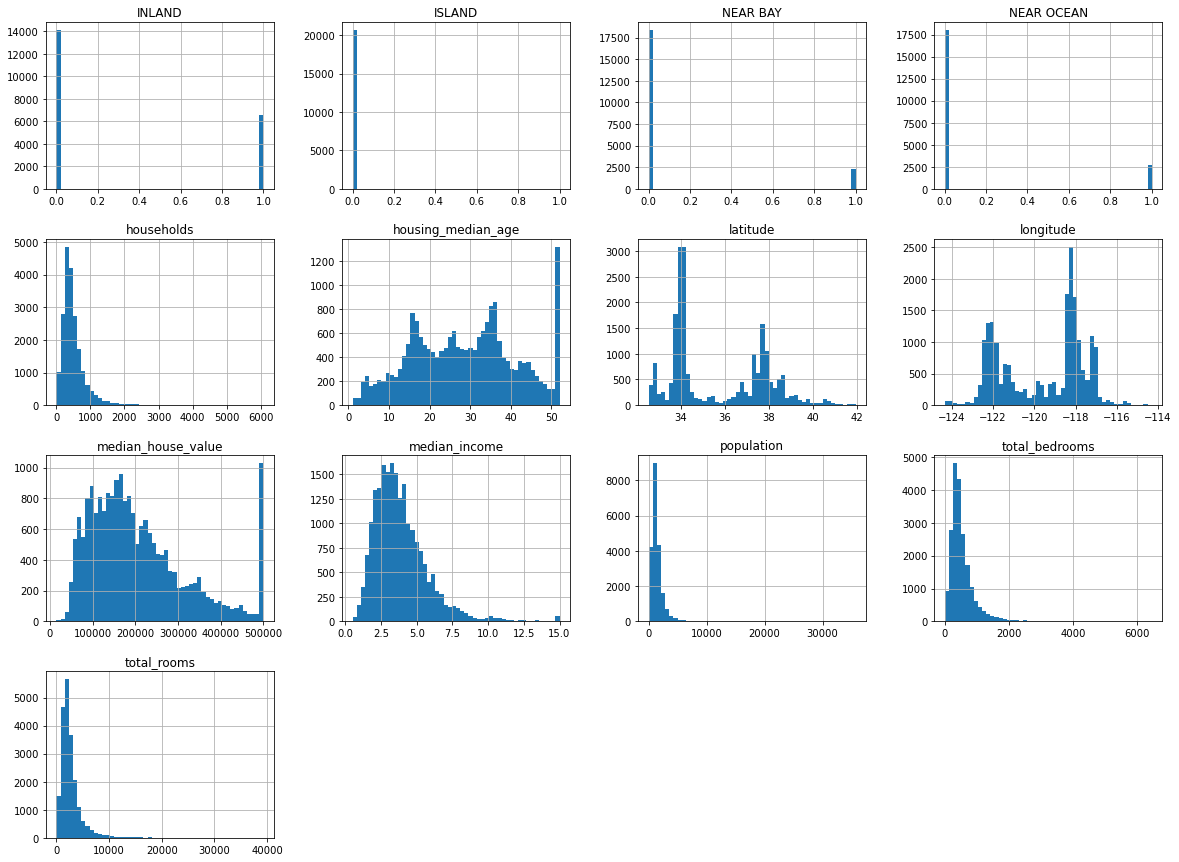

In [19]:
dataframe.hist(bins = 50 , figsize = (20,15))
plt.show()

In [20]:
dataframe['median_income'].value_counts()

3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
4.1514      1
1.2614      1
2.0294      1
6.7079      1
3.7306      1
Name: median_income, Length: 12928, dtype: int64

In [21]:
print(dataframe.min())

longitude               -124.35
latitude                  32.54
housing_median_age            1
total_rooms                   2
total_bedrooms                1
population                    3
households                    1
median_income            0.4999
median_house_value        14999
ocean_proximity       <1H OCEAN
INLAND                        0
ISLAND                        0
NEAR BAY                      0
NEAR OCEAN                    0
dtype: object


In [22]:
print(dataframe.max())

longitude                -114.31
latitude                   41.95
housing_median_age            52
total_rooms                39320
total_bedrooms              6445
population                 35682
households                  6082
median_income            15.0001
median_house_value        500001
ocean_proximity       NEAR OCEAN
INLAND                         1
ISLAND                         1
NEAR BAY                       1
NEAR OCEAN                     1
dtype: object


In [23]:
dataframe['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
303200.0      1
307900.0      1
383200.0      1
360800.0      1
405500.0      1
Name: median_house_value, Length: 3842, dtype: int64

In [24]:
train_set,test_set = train_test_split(dataframe,test_size = 0.2,random_state = 143)

In [25]:
print(len(train_set), "train +",len(test_set), 'test')

16512 train + 4128 test


In [26]:
dataframe['income_cat'] = np.ceil(dataframe['median_income'] / 1.5)
dataframe['income_cat'].where(dataframe['income_cat'] < 5, 5.0, inplace = True)

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

In [28]:
dataframe['income_cat'].value_counts()/len(dataframe)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

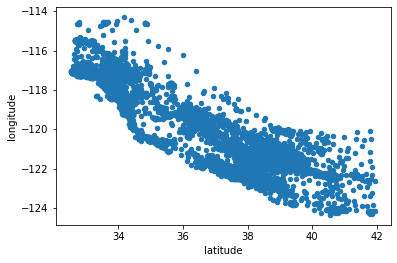

In [29]:
dataframe.plot(kind = 'scatter',x = "latitude",y = "longitude")

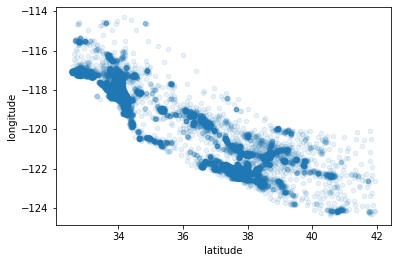

In [30]:
dataframe.plot(kind = 'scatter',x = 'latitude',y = 'longitude',alpha = 0.1)

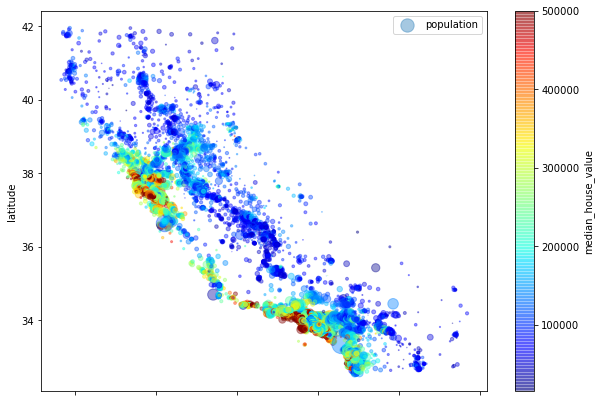

In [31]:
dataframe.plot(kind = 'scatter', x = 'longitude', y = 'latitude',alpha = 0.4,s  = dataframe['population']/100, label = 'population',figsize = (10,7),c = 'median_house_value',cmap = plt.get_cmap('jet'),colorbar = True)
plt.legend()

In [32]:
corr_matrix = dataframe.corr()

In [33]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,income_cat
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.055575,0.009446,-0.474489,0.045509,-0.010690
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.351166,-0.016572,0.358771,-0.160818,-0.085528
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,-0.236645,0.017020,0.255172,0.021622,-0.146920
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,0.025624,-0.007572,-0.023022,-0.009175,0.220528
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.006158,-0.004322,-0.019667,0.000557,0.015641
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.020732,-0.010412,-0.060880,-0.024264,0.025809
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,-0.039402,-0.009077,-0.010093,0.001714,0.038490
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,-0.237496,-0.009228,0.056197,0.027344,0.902750
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,-0.484859,0.023416,0.160284,0.141862,0.643892
INLAND,-0.055575,0.351166,-0.236645,0.025624,-0.006158,-0.020732,-0.039402,-0.237496,-0.484859,1.000000,-0.010614,-0.240887,-0.262163,-0.241403


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AFDE9DC7F0>,
      dtype=object)

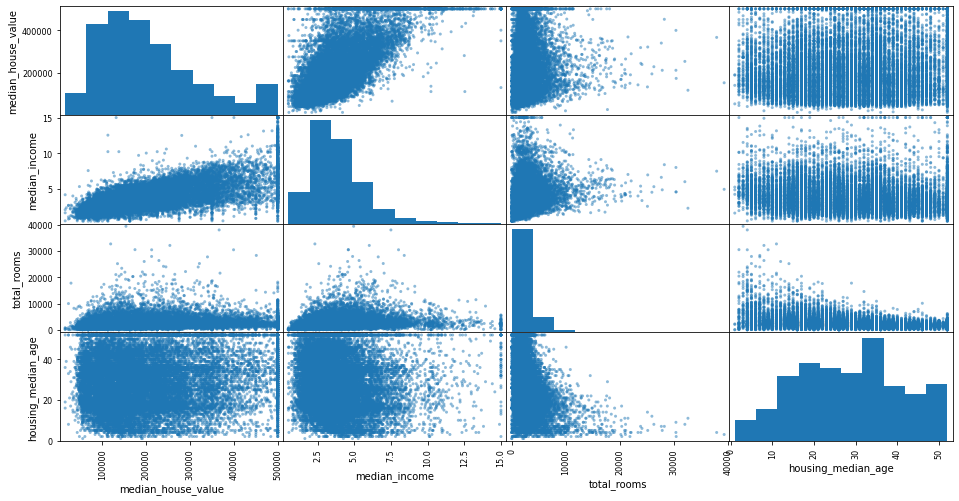

In [34]:

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']
pd.plotting.scatter_matrix(dataframe[attributes],figsize = (16,8))

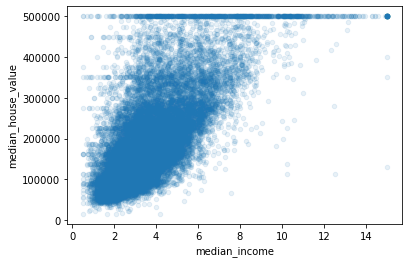

In [35]:
dataframe.plot(kind = 'scatter',x = 'median_income',y = 'median_house_value',alpha = 0.1)

In [36]:
dataframe['rooms_per_household'] = dataframe['total_rooms']/dataframe['households']
dataframe['bedrooms_per_room'] = dataframe['total_bedrooms']/dataframe['total_rooms']
dataframe['population_per_house'] = dataframe['population']/dataframe['households']

In [37]:
corr_matrix = dataframe.corr()

In [38]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value      1.000000
median_income           0.688075
income_cat              0.643892
NEAR BAY                0.160284
rooms_per_household     0.151948
NEAR OCEAN              0.141862
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049457
ISLAND                  0.023416
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_per_room      -0.233303
INLAND                 -0.484859
Name: median_house_value, dtype: float64

In [ ]:
from sklearn.preprocessing import Imputer